In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import cartopy.crs as ccrs

In [17]:
CPm6 = xr.load_dataset('BT_coldpool_mom6forecast_March_init.nc')
CPgl = xr.load_dataset('BT_coldpool_glorys.nc')

C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\cartopy\mpl\geoaxes.py:1601: UserWarning: The following kwargs were not used by contour: 'labels'
  result = super().contour(*args, **kwargs)
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\cartopy\mpl\geoaxes.py:1601: UserWarning: The following kwargs were not used by contour: 'labels'
  result = super().contour(*args, **kwargs)
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\cartopy\mpl\geoaxes.py:1601: UserWarning: The following kwargs were not used by contour: 'labels'
  result = super().contour(*args, **kwargs)
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_validation_env\Lib\site-packages\cartopy\mpl\geoaxes.py:1601: UserWarning: The following kwargs were not used by contour: 'labels'
  result = super().contour(*args, **kwargs)
C:\Users\Laura.Gruenburg\AppData\Local\anaconda3\envs\mom6_valid

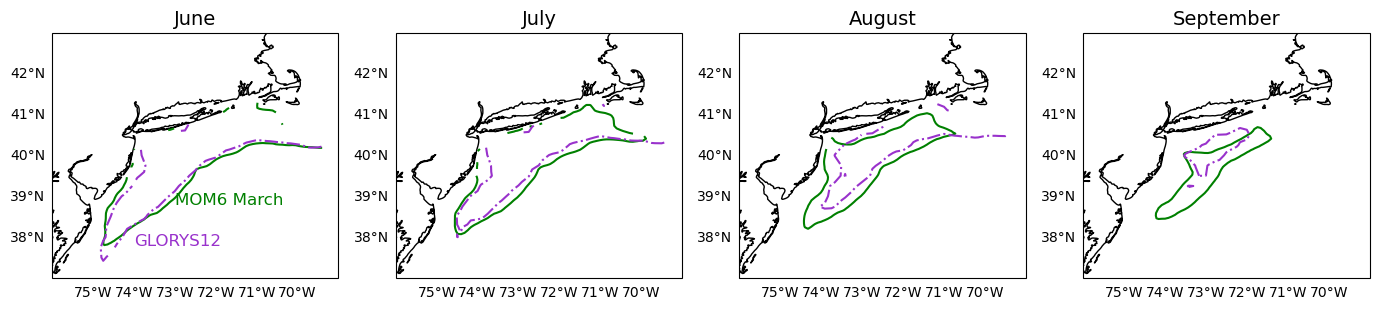

In [21]:
fig, ax = plt.subplots(ncols = 4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(17, 10), sharey = True)
titles = ['June', 'July', 'August','September']
for i in range(4):
    ax[i].set_extent([-76, -69, 37, 43], crs=ccrs.PlateCarree())
    ax[i].coastlines()
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    ax[i].tick_params(labelsize = 12)
    c1 = ax[i].contour(CPm6.lon, CPm6.lat, CPm6.sel(lead = i+3).tob, levels = [10], colors= 'green', labels = 'March')
    #c1 = ax[i].contour(bt_clim_j_mab.lon, bt_clim_j_mab.lat, bt_clim_j_mab.sel(lead = i), levels = [10], colors= 'darkgoldenrod', labels = 'June')
    c2 = ax[i].contour(CPgl.longitude, CPgl.latitude, CPgl.tob.groupby('time.month').mean('time').sel(month = i+6), levels = [10], colors = 'darkorchid', linestyles = '-.',labels = 'GLORYS12')
    ax[i].set_title(titles[i], fontsize = 14)
ax[0].annotate('MOM6 March', [-73, 38.8], color = 'green',fontsize = 12)
#ax[0].annotate('June', [-73.5, 38.2], color = 'darkgoldenrod', fontsize = 12)
ax[0].annotate('GLORYS12', [-74, 37.8], color = 'darkorchid', fontsize = 12)
ax[i].tick_params(labelsize = 12)